# Content Based Recommendation System 

The objective of a content-based recommendation system is to recommend items to a user that are similar to items that the user has previously interacted with. This is done by extracting features from the items that the user has interacted with and then using these features to find other items that are similar.
The features that are extracted from the items can vary depending on the type of item. For example, for movies, the features could include the genre, the cast, the director, and the plot. For books, the features could include the genre, the author, the title, and the keywords.
Once the features have been extracted, they are used to create a vector representation of each item. This vector representation is then used to calculate the similarity between items. The items that are most similar to the items that the user has interacted with are then recommended to the user.

Our objective here is to create a content based recommendation engine using IMDB movies data set

### 1. Importing basic libraries


In [1]:
import pandas as pd 
import numpy as np 


### 2. Importing data 

In [2]:
movies = pd.read_csv(r"C:\Users\prasa\Desktop\ML-Projects\Portfolio\Content based recommendation engine\data\tmdb_5000_movies.csv",encoding='latin8')
credits = pd.read_csv(r"C:\Users\prasa\Desktop\ML-Projects\Portfolio\Content based recommendation engine\data\tmdb_5000_credits.csv",encoding='latin8')
print("Movies data shape: ",movies.shape)
print("Credits data_shape: ",credits.shape)

Movies data shape:  (4803, 20)
Credits data_shape:  (4803, 4)


### 3. Exploring the data

In [3]:
print("Features from movies data frame: ")
columns = movies.columns
for i in columns:
    print(i)

Features from movies data frame: 
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count


In [4]:
print("Features from credits data frame: ")
columns = credits.columns
for i in columns:
    print(i)

Features from credits data frame: 
movie_id
title
cast
crew


#### 3.1. Checking for null values

In [5]:
# Movies data frame
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
# Credits dataframe
credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

#### Observation: 
Nulls are available in "homepage","overview","release_date","runtime" and "tagline" features. 
We will handle the null values after analyzing the importance of each feature in out data_frame.

#### 3.2. Understanding the importance of each feature in the data: Movies 

In [7]:
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


#### 1. Budget 

<AxesSubplot:ylabel='Frequency'>

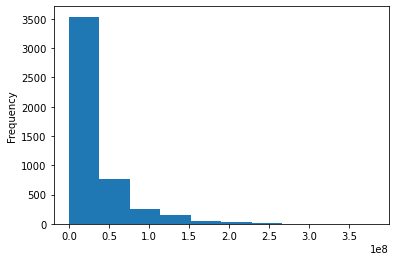

In [8]:
movies['budget'].plot(kind='hist')

#### Observation:
Budget of the movie will not be a deciding factor for recommendation in most of the times. So, budget feature can be ignored.

#### 2. Genre

In [9]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#### Observation:
Genre can be considered as an important feature for recommendation. 

#### 3. Homepage

In [10]:
movies['homepage'][0]

'http://www.avatarmovie.com/'

#### Observation: 
Homepage will not be an important factor for recommendation. Homepage can be ignored.

#### 4. Id

In [11]:
movies['id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

#### Observation: 
Id will not be an important factor for recommendation. Id can be ignored.

#### 5. Original language:


Total records in the movies data frame 4803


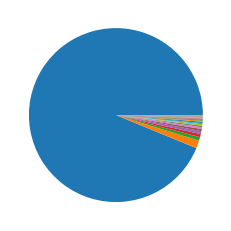

Movies in English language: 4505


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sb
print("Total records in the movies data frame",len(movies))
plt.pie( movies['original_language'].value_counts())
plt.show()
print("Movies in English language:",movies['original_language'].value_counts().values[0])

#### Observation: 
As Most of the movies are in English language (~94%). Language cannot be considered as an important factor for recommendations

#### 6. Keywords

In [13]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

#### Observation:
Keywords can play vital role in the recommendation. 

#### 7. Original title:

In [14]:

movies["title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

#### Observation: 
Recommendations can be generated based on the user search. User will search the movies with their titles, so title will be the key factor here.

#### 8. Overview:


In [15]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

#### Observation: 
Overview provides the summary of the movie. 
Key factor for recommendations

#### 9. Popularity

In [16]:
movies['popularity'].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

#### Note1 : 
Numerical features will not be considered as a criteria for recommendations.
Numerical features that are not considered in the present recommendation engine are: [budget, popularity, release_date,revenue,run_time,vote_average,vote_count]

#### Note2:
Some of the categorical featurres can never decide the recommendations. Such features are: [Status, Tagline, Production_companies, Production_countries]


#### Features from Credits dataframe:

In [17]:
credits['cast'][1]

'[{"cast_id": 4, "character": "Captain Jack Sparrow", "credit_id": "52fe4232c3a36847f800b50d", "gender": 2, "id": 85, "name": "Johnny Depp", "order": 0}, {"cast_id": 5, "character": "Will Turner", "credit_id": "52fe4232c3a36847f800b511", "gender": 2, "id": 114, "name": "Orlando Bloom", "order": 1}, {"cast_id": 6, "character": "Elizabeth Swann", "credit_id": "52fe4232c3a36847f800b515", "gender": 1, "id": 116, "name": "Keira Knightley", "order": 2}, {"cast_id": 12, "character": "William \\"Bootstrap Bill\\" Turner", "credit_id": "52fe4232c3a36847f800b52d", "gender": 2, "id": 1640, "name": "Stellan Skarsg\\u00e5rd", "order": 3}, {"cast_id": 10, "character": "Captain Sao Feng", "credit_id": "52fe4232c3a36847f800b525", "gender": 2, "id": 1619, "name": "Chow Yun-fat", "order": 4}, {"cast_id": 9, "character": "Captain Davy Jones", "credit_id": "52fe4232c3a36847f800b521", "gender": 2, "id": 2440, "name": "Bill Nighy", "order": 5}, {"cast_id": 7, "character": "Captain Hector Barbossa", "credit_

In [18]:
credits['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [19]:
print(credits.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


#### Features that can help in recommendations are: 
[Cast,Crew]

#### Note: Join the Movies and Credits tables on Title or Id for better understanding or for better information about the data.

In [20]:
# Merging the 2 data frames
movies = movies.merge(credits,on='title')
print("Movies data_frame shape: ",movies.shape)
movies.head(4)

Movies data_frame shape:  (4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


#### Drope the unnecessary columns that are not involved in deciding the recommendations

In [21]:
movies_df = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 4. Data transformation - Feature Engineering

#### 4.1 Checking and correcting null values

In [22]:
movies_df.isna().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### Note:
Missing values are found in the movies data frame. As the no of missing values count is very less, we can drop the rows corresponding to the missing values.
    

In [23]:
movies_df.dropna(inplace=True)
movies_df.isna().sum()

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\1598462613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.dropna(inplace=True)


movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### 4.2. Transforming the categorical features into meaningful values

##### 4.2.1. Transforming GENRES:


In [24]:
import ast
def convert_genres(text):
    genres_list = []
    list_text = ast.literal_eval(text)
    for i in list_text:
        name = i['name']
        genres_list.append(name)
    return genres_list
    


In [25]:
movies_df['genres'] = movies_df['genres'].apply(convert_genres)
movies_df.head()

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\267018621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(convert_genres)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### 4.2.2. Transforming KEYWORDS

In [26]:
movies_df['keywords'] = movies_df['keywords'].apply(convert_genres)
movies_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\2223287936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = movies_df['keywords'].apply(convert_genres)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### 4.2.3. Transforming CAST

In [27]:
def convert_cast(text):
    list_cast = []
    count=0
    for i in ast.literal_eval(text):
        if count<3:
            name = i['name']
            name = name.replace(" ","")
            list_cast.append(name)
        else:
            break
    return list_cast

movies_df['cast'] =movies_df['cast'].apply(convert_cast)
movies_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\1598617260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['cast'] =movies_df['cast'].apply(convert_cast)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman, Anne...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### 4.2.4 Transforming CREW


In [28]:
def convert_crew(text):
    list_cast = []
    count=0
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            name = i['name']
            list_cast.append(name)
            break
    return list_cast

movies_df['crew'] =movies_df['crew'].apply(convert_crew)
movies_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\2964716164.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['crew'] =movies_df['crew'].apply(convert_crew)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[Andrew Stanton]


##### Removing the spaces between the names.  

In [29]:
movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies_df['cast'] = movies_df['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies_df['crew'] = movies_df['crew'].apply(lambda x:[i.replace(" ","") for i in x])

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\606156170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\606156170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\606156170.py:3: SettingWithCopyWarning: 
A value is tryi

#### Data frame preview:

In [30]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bondâs past sends him...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


##### Note:
Now the data is clean enough to perform the further operations. 
Next steps involves creating tags for each movie and vecttorizing the results in order to get recommendations based on cosine similarity

#### 4.2.5. Converting OVERVIEW feature into list, such that it will be easy for concatination

In [31]:
movies_df['overview'] = movies_df['overview'].apply(lambda x: x.split())
movies_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\3390777454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['overview'] = movies_df['overview'].apply(lambda x: x.split())


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bondâs, past, se...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


### 4.3. Creating the tags

#### 4.3.1. Concatinating the features

In [32]:
movies_df['targets'] = movies_df['overview']+movies_df['keywords']+movies_df['cast']+ movies_df['genres']+movies_df['crew']
modified_df = movies_df[['movie_id','title','targets']]
modified_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\3309392174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['targets'] = movies_df['overview']+movies_df['keywords']+movies_df['cast']+ movies_df['genres']+movies_df['crew']


,movie_id,title,targets
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bondâs, past, se..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [33]:
# Combining all the word in the targets column 
modified_df['targets'] = modified_df['targets'].apply(lambda x:" ".join(x))
modified_df.head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\131239721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['targets'] = modified_df['targets'].apply(lambda x:" ".join(x))


,movie_id,title,targets
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bondâs past sends him...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [34]:
# Converting the tags into lower case
modified_df['targets'] = modified_df['targets'].apply(lambda x: x.lower())
modified_df.head(4)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\2159119054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['targets'] = modified_df['targets'].apply(lambda x: x.lower())


,movie_id,title,targets
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bondâs past sends him...
3,49026,The Dark Knight Rises,following the death of district attorney harve...


#### 4.3.2. Performing stemming 

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)


In [37]:
modified_df['targets'] = modified_df['targets'].apply(stem)
modified_df['targets'].head(5)

C:\Users\prasa\AppData\Local\Temp\ipykernel_19276\2741646579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['targets'] = modified_df['targets'].apply(stem)


0    in the 22nd century, a parapleg marin is dispa...
1    captain barbossa, long believ to be dead, ha c...
2    a cryptic messag from bondâ past send him on...
3    follow the death of district attorney harvey d...
4    john carter is a war-weary, former militari ca...
Name: targets, dtype: object

In [38]:
modified_df.head(5)

,movie_id,title,targets
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bondâ past send him on...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


#### 4.3.3. Performing vectorization : Bag of words


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)
vectors=cv.fit_transform(modified_df['targets']).toarray()
vectors.shape


(4806, 5000)

### 5. Recommendation function

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
def recommend(movie):
    index = modified_df[modified_df['title']==movie].index[0]
    #print(index)
    distances = sorted(list(enumerate(cosine_similarity(vectors)[index])),reverse=True,key=lambda x:x[1])[0:5]
    for i in distances:
        #print(i)
        print(modified_df.iloc[i[0]]['title'])
        
print("Please find the similar kind of results: ")        
recommend("Avatar")

Please find the similar kind of results: 
Avatar
Aliens vs Predator: Requiem
Predator
Battle: Los Angeles
Independence Day


#### Creating pickle files for Streamlit use

In [55]:
# Creating movies pickle file
import pickle 
pickle.dump(modified_df.to_dict(),open("movies.pkl","wb"))

In [56]:
# Creating cosine similarity pickle file 
pickle.dump(cosine_similarity(vectors),open("similarity.pkl","wb"))